## EDA To Prediction (DieTanic)


The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanc Dataset is a very good dataset for begginers to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.



타이타닉의 침몰은 역사상 가장 악명 높은 조난 사고이다. 1912년 4월 15일 타이타닉의 최초의 항해중에 타이타닉은 빙하와 충돌해 가라앉았고, 2224명의 승객과 크루들 중 1502명을 죽음으로 몰아넣었다. 그래서 DieTanic이라고 이름 지었다. 전세계 누구도 잊을 수 없는 재앙이다. 

타이타닉을 만드는 데 750만달러가 들어갔고, 충돌에 의해 바다밑으로 가라앉았다. 타이타닉 데이터셋은 데이터 사이언스를 시작하고 캐글 대회에 참가하는 초보자들에게 가장 좋은 데이터셋이다. 

이 노트북의 특징은 예측 모델링 문제를 어떻게 해결하는지에 대한 아이디어를 줄 것이다. 피쳐들을 어떻게 확인하고, 새로운 피쳐와 머신러닝 개념을 추가하는지. 뉴비들도 이 과정을 이해할수 있도록 가능한 쉽게 노트북을 만들려고 노력했다.

### Contents of the Notebook:

**Part1: Exploratory Data Analysis(EDA):**

1) Analysis of the features.

2) Finding any relations or trends considering multiple features. 


**Part2: Feature Engineering and Data Cleaning:**

1) Adding any features.

2) Removing redundant features.

3) Converting features into suitable form for modeling.


**Part3: Predictive Modeling:**

1) Running Basic Algorithms.

2) Cross Validation.

3) Ensembling.

4) Important Features Extraction.


**Part1: 탐색적 자료 분석:**

1) 피쳐 분석

2) 여러 피쳐들을 고려해 상관관계나 추세 찾기
 

**Part2: 피쳐 엔지니어링과 데이터 정제**

1) 몇몇 피쳐들 추가하기

2) 불필요한 피쳐 삭제하기

3) 피쳐들을 모델링에 적절한 형태로 변환하기


**Part3: 예측 모델링**

1) 기본 알고리즘 실행하기

2) 교차 검증

3) 앙상블

4) 중요한 피쳐 추출

## Part1: Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("../input/titanic/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() #checking for total null values
                    #널값 확인하기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

Age, Cabin, Embarked가 널값을 가짐. 해결해보자

### How many survived? (얼마나 많은 사람들이 생존했을까?)

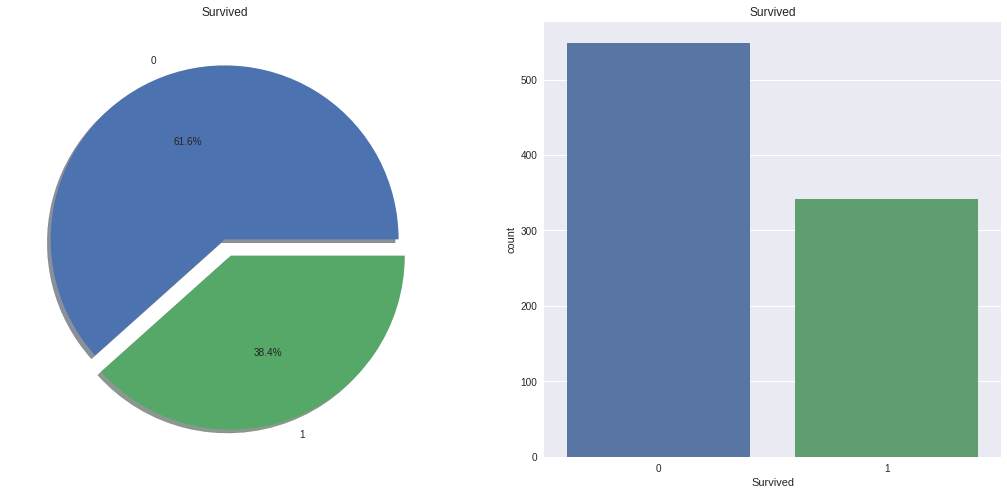

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.

First let us understand the different types of features.




많은 승객들이 이 사고에서 살아남지 못했음은 분명하다.

훈련데이터셋의 891명의 승객 중에 350명만 생존했다. 다시 말해서 전체 훈련데이터 셋의 38.4%만이 이 충돌에서 살아남았다. 데이터로 부터 더 나은 인사이트를 구하고 어떤 종류의 승객이 살아남았고, 살아남지 못했는지를 알아볼 필요가 있다.

첫째로 피쳐들의 다른 유형들을 이해해보자.

### Type of Features

#### Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two cateogories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex, Embarked**.

#### Ordinal Features:

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: Pclass**

#### Continuous Feature:

A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continuous Features in the dataset: Age**



범주형 변수:

범주형 변수는 2개 이상의 속성을 갖고 있고 피쳐 각각의 값이 속성들에 의해서 범주화되는 것을 말한다.  예를 들어 성별은 남과 여로 2개의 범주를 가진 범주형 변수이다. 이제 우리는 이러한 변수를 정렬하거나 순서화시킬 수 없다. 명목형 변수로도 알려져있다. 

이 데이터셋에서의 범주형 변수: Sex, Embarked

순서형 변수:

순서형 변수는 범주형 변수와 비슷한데, 차이점은 값들 사이에 상대적인 순서와 정렬을 가진다는 것이다. 예를 들어: 큼, 중간, 작음의 값을 가진 키와 같은 변수를 가지고 있다면, 키는 순서형 변수이다. 이 변수로 상대적인 정렬을 할 수 있다.

이 데이터셋에서의 순서형 변수: Pclass

연속형 변수:

피쳐컬럼 내에서 어떠한 두 점 사이나 최솟값과 최댓값 사이에 값을 가질 수 있다면 이 변수는 연속적이라고 할 수 있다.

이 데이터셋에서의 연속형 변수: Age

### Analysing the Features

### Sex → Categorical Feature

In [7]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

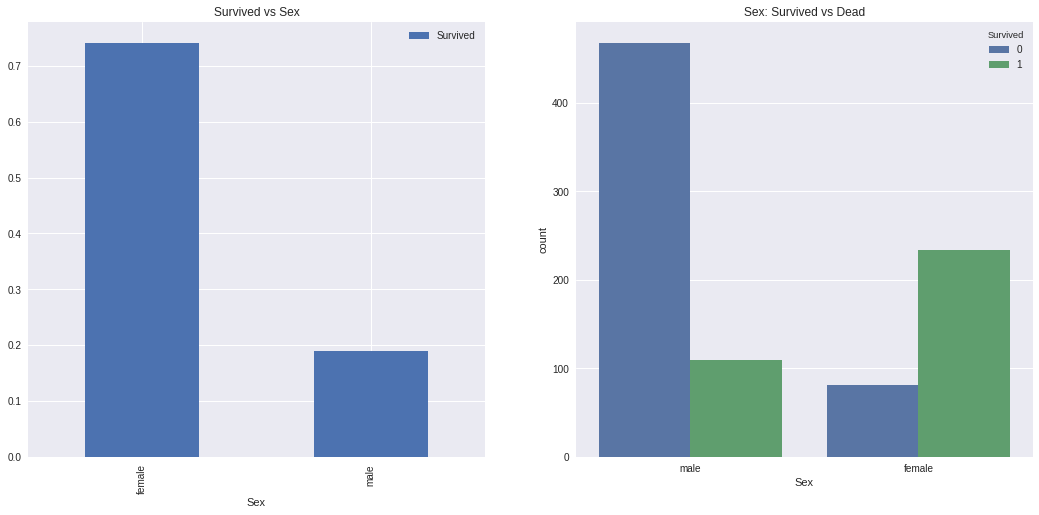

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. **The survival rates for a women on the ship is around 75% while that for men is around 18-19%**.


흥미로운 점을 발견했다. 배에 탄 남성의 수가 여성의 수보다 훨씬 많다. 그러나 생존한 여성의 수가 생존한 남성의 수보다 두배 많다. 배에 탄 여성의 생존율이 약 75%인 반면에 남성의 생존율은 18-19%이다.

### Pclass → Ordinal Feature

In [9]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


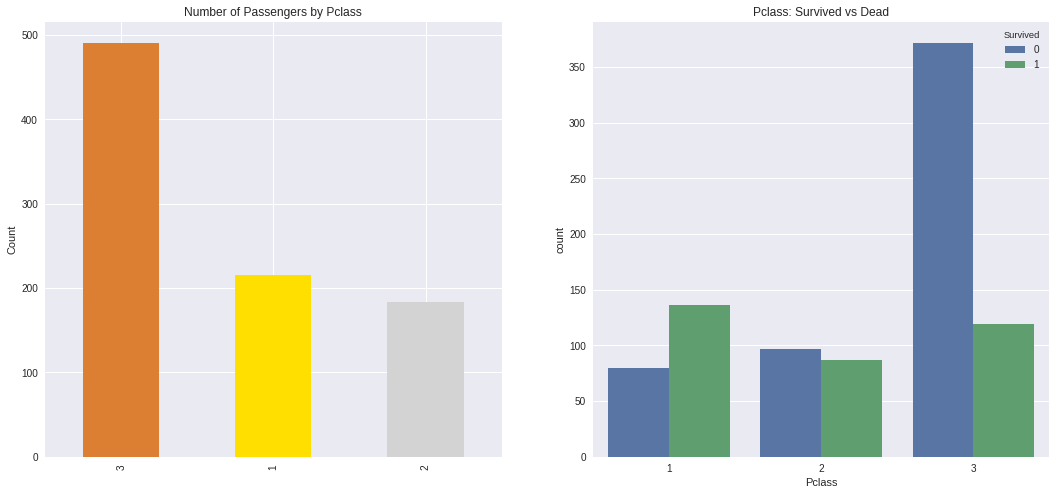

In [10]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#DC7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pclass1 were given a very high priority while rescue. Even though the number of Passengers in Pclass3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters. Such a materialistic world.

Lets Dive in little bit more and check for other interesting observations. Let's check survival rate with **Sex and Pclass** Together. 


사람들은 돈이 모든 것을 살 수 없다고 말한다. 그러나 우리는 Pclass1의 승객들이 구조에 있어 매우 높은 우선권이 주어졌음을 명확하게 볼 수 있다. Pclass3의 승객들의 수가 훨씬 더 많았음에도 불구하고 생존자의 수는 25%정도로 매우 낮다.

Pclass1의 생존율은 약 63%인 반면, Pclass2의 생존율은 약 48%이다. 그러므로 돈과 지위는 중요하다. 완전 물질만능주의 세계다.

더 깊이 들어가서 다른 흥미로운 관찰치를 확인해보자. Sex와 Pclass의 생존율을 같이 봐보자. 

In [11]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

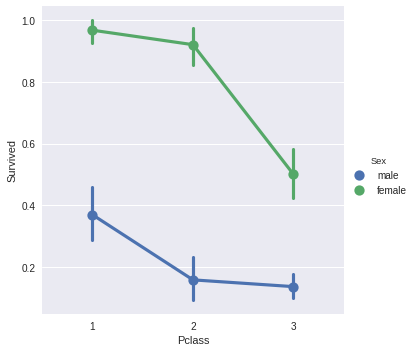

In [12]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **FactorPlot** in this case, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that **survival for Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first prioriry while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Let's analyse other features.


FactorPlot은 명목형 값을 쉽게 분리해주기 때문에 이러한 경우엔 FactorPlot을 사용한다.

CrossTab과 FactorPlot을 보면, Pclass1의 여성 94명 중 3명만 사망했기 때문에 Pclass1의 여성의 생존율이 약 95-96%임을 쉽게 추론할 수 있다. 

Pclass에 상관없이, 여성이 구조에 있어 최우선권이 주어졌음을 알 수 있다. 심지어는 Pclass1의 남성이 가장 낮은 생존율을 가지고 있다. 

Pclass 또한 중요한 피쳐인 것 처럼 보인다. 다른 피쳐들을 분석해보자

### Age → Continuous Feature

In [13]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')      

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


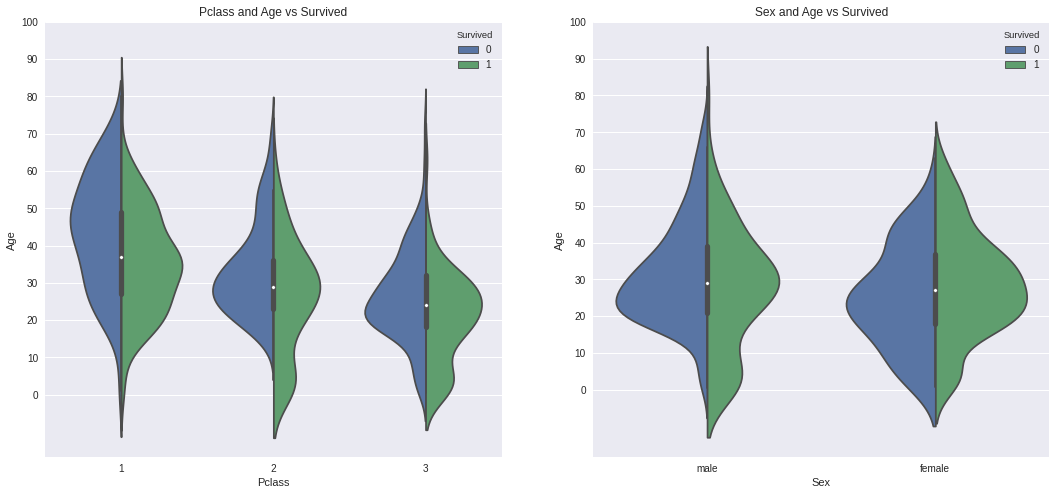

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

**Observations:**

1) The number of children increases with Pclass and the survival rate for passengers below Age 10(i.e children) looks like to be good irrespective of the Pclass.

2) Survival chance for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3) For males, the survival chance decreases with an increase in age.



1) 어린이들의 수는 Pclass와 같이 증가하고 10세 이하의 즉 어린이의 생존율은 Pclass와 상관없이 높아 보인다.

2) Pclass1의 20-50세의 승객들의 생존 가능성은 높고 특히 여성들이 더 높다.

3) 남성의 경우에 생존 가능성은 나이가 많아짐에 따라 줄어든다. 

As we had seen earilar, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?

Bingo!!!!, we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

**"What's In A Name?" ---> Feature**:p


아까 봤듯이, Age 피쳐는 177개의 널값을 가지고 있다. 이 NaN 값들을 대체하기 위해서 우리는 데이터 셋의 평균 나이를 할당할 수 있다. 

그런데 문제는 다양한 나이를 가진 사람들이 많다는 것이다. 우리는 4살 아이에게 평균 나이인 29세를 할당할 수 없다. 승객의 연령대가 무엇인지 알 수 있는 방법이 어디 없을까?

여기 있다! Name 피쳐를 확인하면 된다. 이 피쳐를 보면, 이름은 Mr나 Mrs와 같은 호칭(?)을 볼 수 있다. 이런식으로 우리는 각 그룹에 맞게 Mr과 Mrs의 평균값을 할당할 수 있다. 

Name 안에 있는 거? 피쳐로 만들기

In [15]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutation
                                                             #호칭(?) 추출하기

Okay, so here we are using the Regex: **[A-Za-z]+).**. So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials from the Name.


여기서 정규표현식([A-Za-z]+.)을 사용한다. A-Z나 a-z사이에 있고, 뒤에 쉼표가 딸려있는 문자열을 찾아준다. 그래서 우리는 성공적으로 Nama 피쳐에서 Initial을 추출할 수 있다.

In [16]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex (이니셜과 성별 확인)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay, so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

Miss를 Mlle나 Mme처럼 오타가 난 Initial들이 있다. 이것들을 Miss로 대체할 것이고 다른 값들에 대해서도 똑같이 할 섯이다. 

In [17]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials
                                      #Initial에 따른 평균 나이를 확인해보자

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages (Age의 널값 채우기)

In [19]:
## Assigning the NaN Values with the Ceil values of the mean ages
## 평균나이를 올림해서 NaN 값에 할당하기

data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [20]:
data.Age.isnull().any() #So no null values left finally (마침내 널값이 남아있지 않다)

False

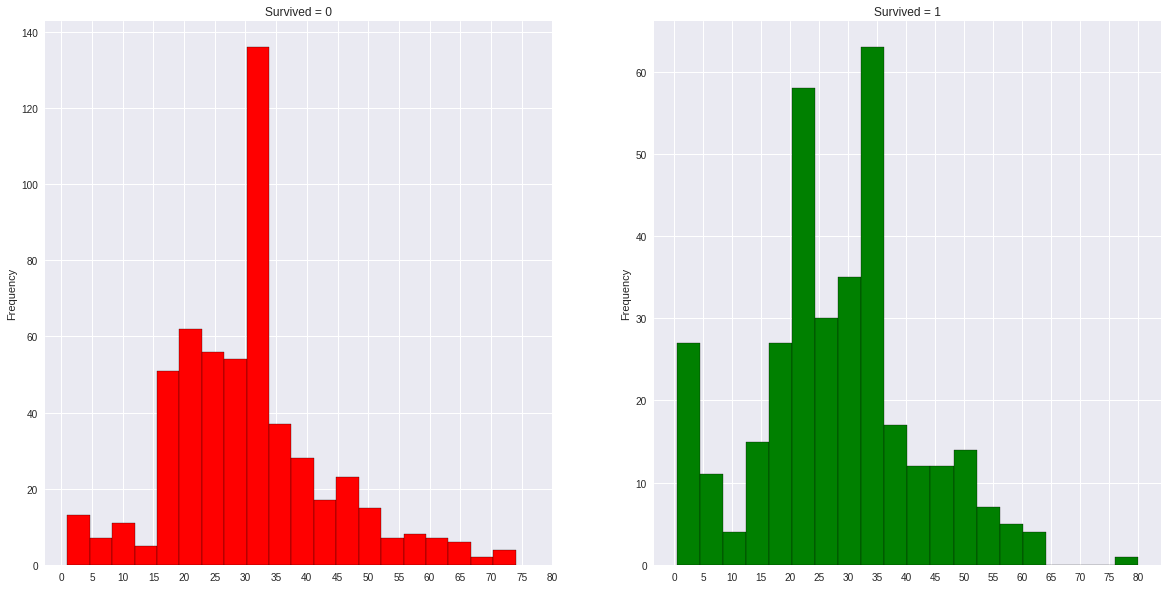

In [21]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

**Observations:**

1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2) The oldest Passengers was saved(80 years).

3) Maximum number of deaths were in the age group of 30-40.


1) 5세 미만의 아이들이 상당수 구해졌다. (여성과 어린이부터 구하는 정책)

2) 구조된 가장 나이 많은 승객은 80세이다.

3) 사망자의 가장 많은 수는 30-40 연령층에 있다. 

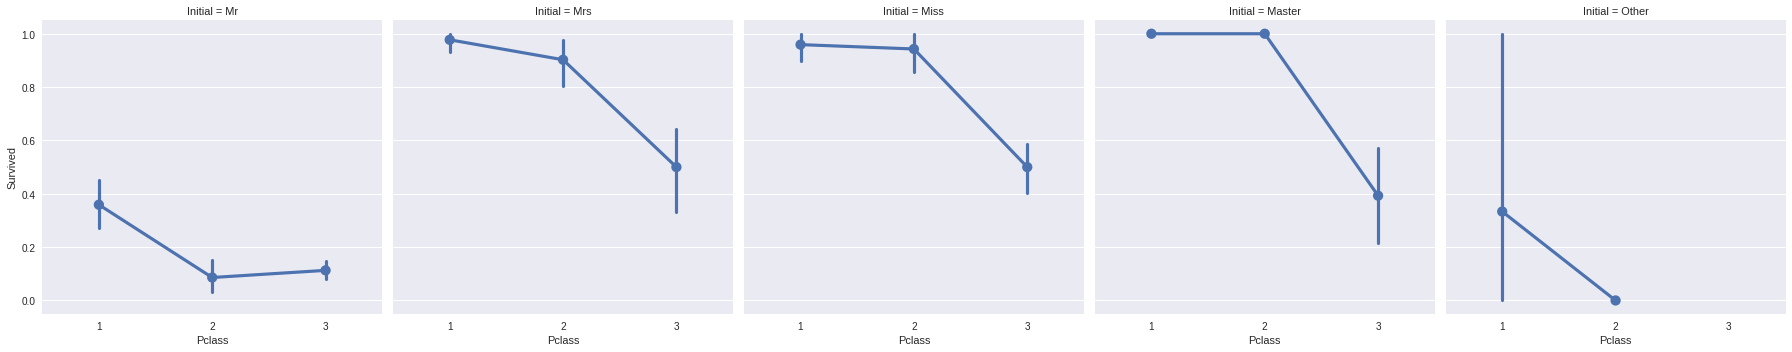

In [22]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the Pclass.

Pclass와 상관없이 여성과 아이들 먼저 구조 정책은 사실임을 보여준다.

### Embarked --> Categorical Value

In [23]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

#### Chance for Survival by Port Of Embarkation (탑승한 항구에 따른 생존 가능성)

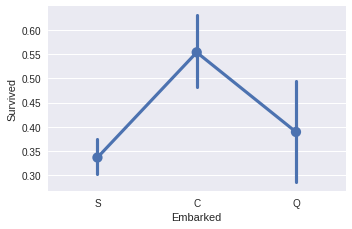

In [24]:
sns.factorplot('Embarked', 'Survived', data=data)
fig = plt.gcf()
fig.set_size_inches(5, 3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.


항구 C의 생존 가능성이 약 0.55로 가장 높은 반면 S가 가장 낮다.

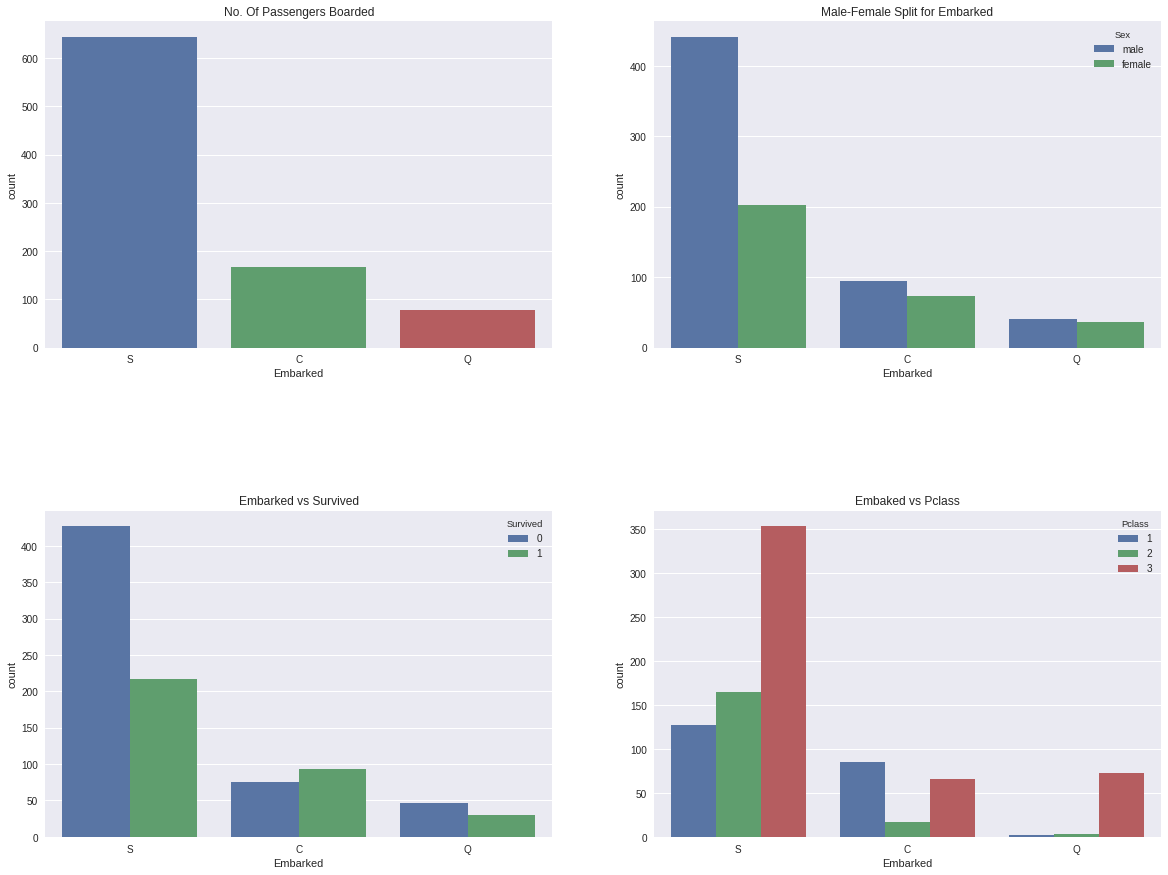

In [25]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embaked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Observations:**

1) Maximum passengers boarded from S. Majority of them being from Pclass3.

2) The passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around **81%** didn't survive.

4) Port Q had almost 95% of the passengers were from Pclass3.


1) 가장 많은 승객들은 S 탑승구로 승선했다. 그들 중 다수는 Pclass3이다. 

2) 생존자들의 비율이 크기 때문에 C에서 탑승한 승객들은 운이 좋아보인다. 이 이유는 아마도 Pclass1과 2의 승객들이 구조되었기 때문이다. 

3) S 탑승구는 다수의 부자들이 승선했던 탑승구로 보인다. 그러나 생존가능성은 낮았는데, 약 81%의 Pclass3의 많은 승객들이 살아남지 못했기 때문이다.  

4) Q 탑승구는 거의 승객의 95%가 Pclass3이다. 

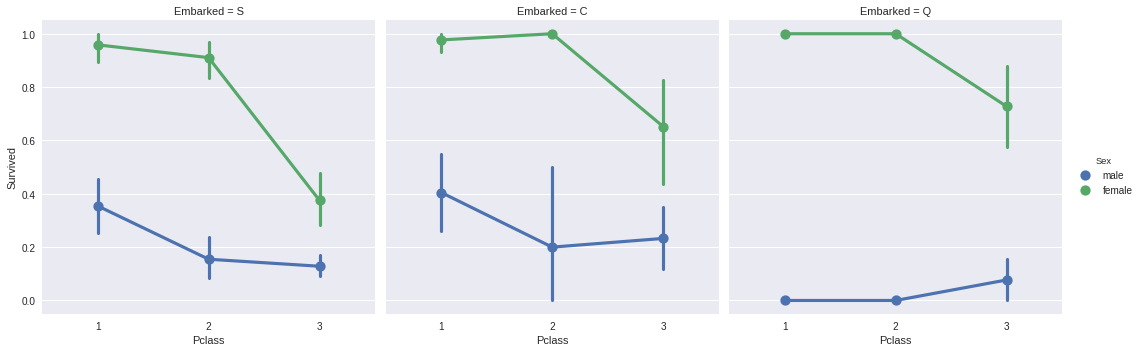

In [26]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

Observations:

1) The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Embarked.

2) Port S looks to be very unluncky for Pclass3 Passengers as the survival rate for both men and women is very low.(Money Matters)

3) Port Q looks to be unlukiest for Men, as almost were from Pclass3.


1) Embarked와 관계없이 Pclass1과 2의 여성들의 생존가능성은 거의 1이다.

2) Pclass3의 승객들은 여성과 남성 모두 생존율이 낮기 때문에 S 탑승구는 매우 불행해보인다. (결국 돈이 중요하다)

3) Q 탑승구는 거의 모두가 Pclass3에서 왔기 때문에 남성이 가장 불운한 것 같다.

#### Filling Embarked NaN (Embarked의 널값 채우기)

As we saw that maximum passengers boarded from Port S, we replace NaN with S.

가장 많은 승객이 승선한 탑승구가 S임을 봤기 때문에, 널값을 S로 대체할 것이다. 

In [27]:
data['Embarked'].fillna('S', inplace=True)

In [28]:
data.Embarked.isnull().any() #Finally No NaN values(이제 널값 없다)

False

### SibSp --> Discrete Feature (이산형 피쳐)

This feature represents whether a person is alone or with his family members.

이 피쳐는 사람이 혼자 사는지 가족이랑 사는지 알려준다.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [29]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


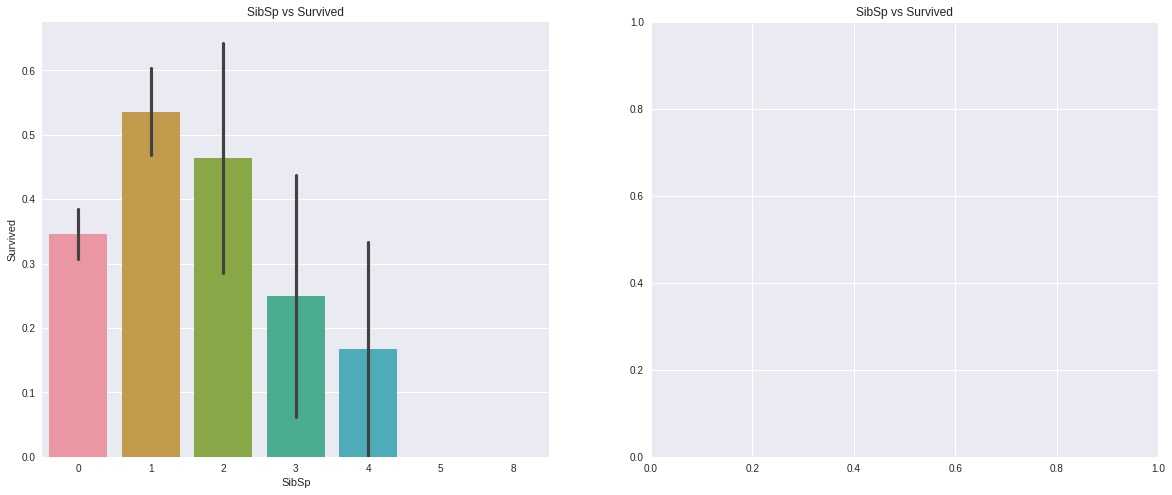

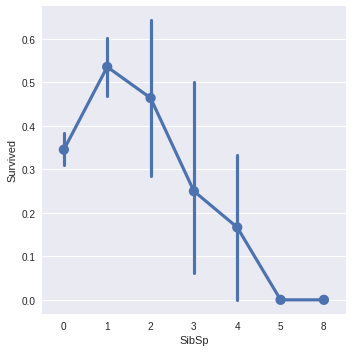

In [30]:
f, ax=plt.subplots(1, 2, figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
#plt.close(2)   #원래 두번째 서브플랏 없어져야되는데 안 없어짐...
plt.show()

In [31]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Obsevations:**

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is eminent that all the large families in Pclass3(>3) died.


barplot과 factorplot은 남매 없이 혼자 탑승한 승객이면 34.5%의 생존율을 가진다는 것을 보여준다. 남매의 수가 증가할 수록 그래프는 대략 감소한다. 일리가 있다. 즉 만약 내가 가족이랑 탑승했다면 나는 나 먼저 살려고 하기보다 가족들을 구하려고 할 것이다. 놀랍게도 구성원이 5-8명되는 가족의 생존율은 0%이다. 아마 이유는 Pclass?

이유는 Pclass다. 교차표는 가족이 3명보다 많은 사람들이 모두 Pclass3에 있었음을 보여준다. Pclass3에 있던 3명보다 많은 가족들은 모두 사망했음은 확실하다.


### Parch

In [32]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass3.

교차표는 가족이 클수록 Pclass3에 있었음을 다시 보여준다. 

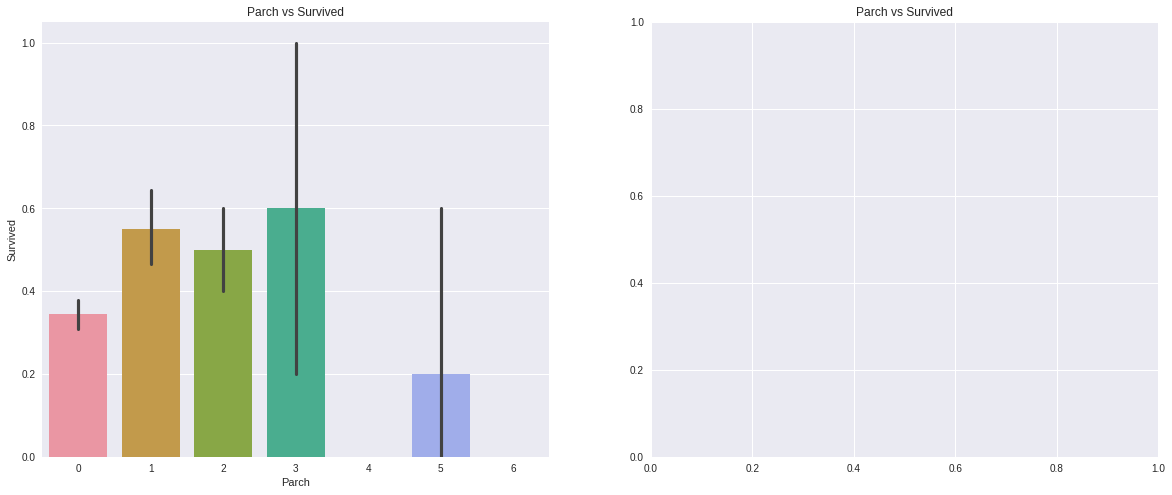

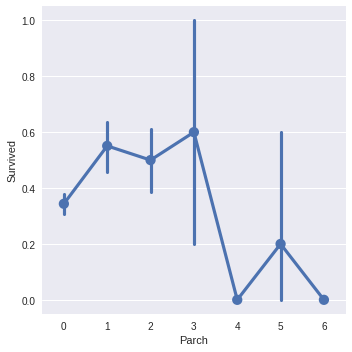

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
#plt.close(2) #이번에도 역시 두번째 서브플랏 안 없어짐.. 
plt.show()

Observations:

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also prove to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.


역시 결과가 비슷하다. 부모와 탑승한 승객은 생존가능성이 높다. 그러나 수가 커질수록 감소한다.

생존가능성은 배에 1-3명의 부모를 가진 누군가에겐 높다. 혼자 있는 것은 또 치명적임을 입증하고 생존가능성은 4명보다 많은 부모가 있다면 줄어든다. 

In [34]:
### Fare --> Continuous Feature

In [35]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is 0.0. Wow!! a free luxorious ride.

가장 낮은 요금은 0이다. 와 공짜로 럭셔리한 탑승이라니.

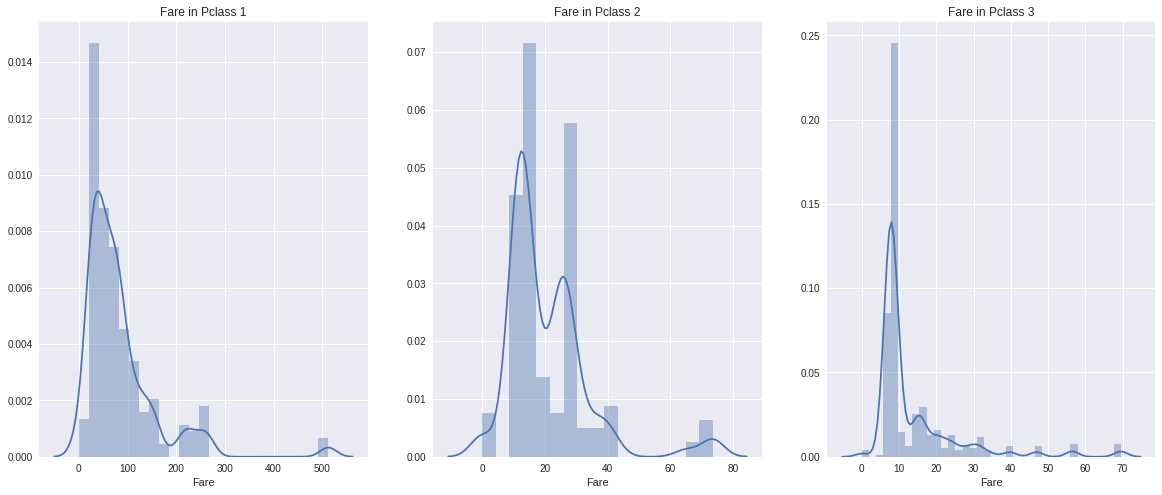

In [36]:
f, ax = plt.subplots(1, 3, figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fare in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fare in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fare in Pclass 3')
plt.show()

### Observation in a Nutshell for all features:

**Sex:** The chance of survival for women is high as compared to men.

**Pclass:** There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For women, the chance of survival from **Pclasss1** is almost 1 and is high too for those from **Pclass2**. **Money Wins!!**

**Age:** Children less that 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chance of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**.

**Parch+SibSp:** Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probablity rather than being alone or havig a large family traveling with you.


모든 피쳐들에 대한 요약

Sex: 여성의 생존가능성이 남성보다 높다

Pclass: 1등석 승객이 생존가능성이 높다는 분명한 경향이 있다. Pclass3의 생존율은 매우 낮다. 여성의 경우 Pclass1의 생존가능성이 거의 1이고 Pclass2 역시 높다. 돈이 이긴다!!

Age: 5-10세 밑의 아이들은 높은 생존가능성을 가진다. 15-35세 사이의 연령대는 많이 죽었다.

Embarked: 매우 흥미로 피쳐이다. 탑승구 C의 생존가능성이 Pclass1 승객 다수가 탑승한 탑승구 S보다 더 높은 것 같다. 탑승구 Q의 승객은 전부 Pclass3이었다.

Parch+SibSp: 1-2명의 남매와 배우자와 탑승하거나 1-3명의 부모와 탑승하는것은 혼자 탑승하거나 대가족와 여행하는 경우보다 높은 생존율을 가진다. 



### Correaltion Between The Features

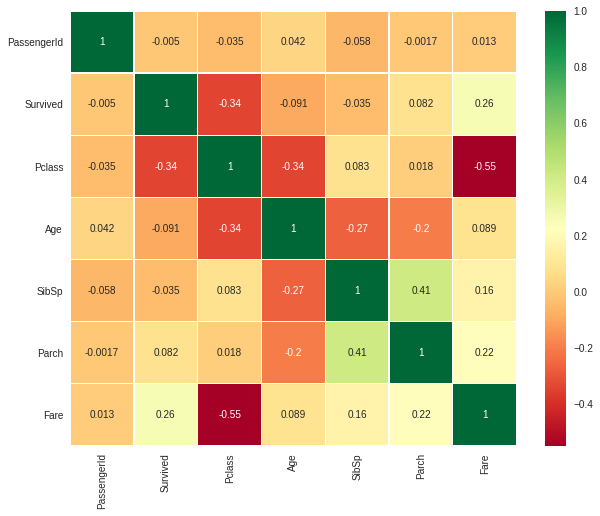

In [37]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2) 
#data.corr() : Correlation Matrix (상관계수 행렬)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

#### Interpreting The Heatmap

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

PISITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation. 

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.


Heatmap 해석하기

주목해야할 첫번째는 알파벳이나 문자열과는 상관관계를 밝히기 어렵기 때문에 수치형 피쳐끼리만 비교된다는 것이다. 그래프를 이해하기 전에 상관계수가 정확하게 무엇인지 알아보자.

양의 상관관계: 피쳐 A의 증가 피쳐 B의 증가에 영향을 끼친다면, 이들은 양의 상관관계를 이룬다고 할 수 있다. 값 1은 완벽한 양의 상관관계를 의미한다. 

음의 상관관계: 피쳐 A의 증가 피쳐 B의 감소에 영향을 끼친다면, 이들은 음의 상관관계를 이룬다고 할 수 있다. 값 -1은 완벽한 음의 상관관계를 의미한다.

두 피쳐가 상당히 또는 완벽하게 상관관계를 이룬다고 한다면, 하나의 증가는 다른 하나를 증가시킨다고 할 수 있다. 이것은 두 피쳐 모두 상당히 비슷한 정보를 포함하고 있고 정보 자체에 어떤 작은 차이도 없다는 것을 의미한다. 두 피쳐 모두 거의 똑같은 정보를 포함하고 있기 때문에 다중공선성이라고 알려져 있다. 

그래서 둘중 하나는 불필요한데 둘다 써야한다고 생각하나. 모델을 만들거나 훈련시키는 동안, 훈련시간과 많은 그런 장점들을 줄이기 때문에 불필요한 피쳐를 제거하기 위해 노력해야한다. 

이제 위의 heatmap을 보면, 피쳐들끼리 그렇게 많은 상관성이 있지 않음을 볼 수 있다. 가장 큰 상관관계는 SibSp와 Parch사이에 있는데 0.41이다. 그래서 우리는 모든 피쳐로 수행할 수 있다. 

### Part2: Feature Engineering and Data Cleaning (피쳐엔지니어링과 데이터 정제)

Now what is Feature Engineering?

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other fetures. 

An example would be getting the Initial feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predictive Modeling.


피쳐 엔지니어링이 무엇인가?

피쳐들이 있는 데이터셋이 주어질 때마다 모든 피쳐들이 중요한 것은 아니다. 제거되어야 할 많은 불필요한 피쳐들이 있을 것이다. 또한 우리는 다른 피쳐들로 부터 정보를 추출하거나 탐색함으로써 새로운 피쳐들을 얻거나 추가해야 한다. 

하나의 예는 Name 피쳐를 통해 Initial 피쳐를 얻은 것이다.우리가 새로운 피쳐를 얻을 수 있고, 지울수 있는지 확인해보자. 또한 우리는 존재하고 있는 적절한 피쳐들을 예측 모델링에 적합한 형태로 변환할 것이다.

### Age_band

**Problem With Age Feature:**

As I have mentioned earlier that **Age is a continuous feature**, there is a problem with Continuous Variables in Machine Learning Models.

**Eg:** If I say to group or arrange Sports People by **Sex**, We can easily segregate them by Male and Female.

Now If I say to group them by their **Age**, then how would you do it? If there are 30 people, there may be 30 age values. Now this is problematic.

We need to convert these **continuous values into categorical values** by either Binning or Normalization. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins. So 80/5 = 16. So size of bins 16.


Age 피쳐가 가진 문제:

Age는 연속형 피쳐임을 이전에 언급했듯이, 머신러닝 모델에서 연속형 변수는 문제가 잇다.

예: 운동선수를 성별로 그룹화하거나 배열하라고 한다면, 쉽게 여성과 남성으로 분류할 수 있다. 

이제 그들의 나이로 그룹화하라고 한다면, 우리는 어떻게 할 것인가? 30명의 사람들이 있다면 30개의 나이 값이 있을 것이다. 문제가 되는 부분이다.

우리는 구간화나 표준화를 통해 연속형 값을 범주형 값으로 변환할 필요가 있다. 나는 나이의 범위를 하나의 구간으로 그룹화하거나 하나의 값으로 할당하는 구간화를 사용할 것이다.

승객 중 가장 많은 나이는 80이었다. 0부터 80의 범위를 5개의 구간으로 나눠보자. 80/5 - 16이고, 구간의 크기는 16이다.


In [38]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [39]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
#Checking the number of passengers in each band (각 밴드에 속하는 승객의 수 확인하기)

,Age_band
1,382
2,325
0,104
3,69
4,11


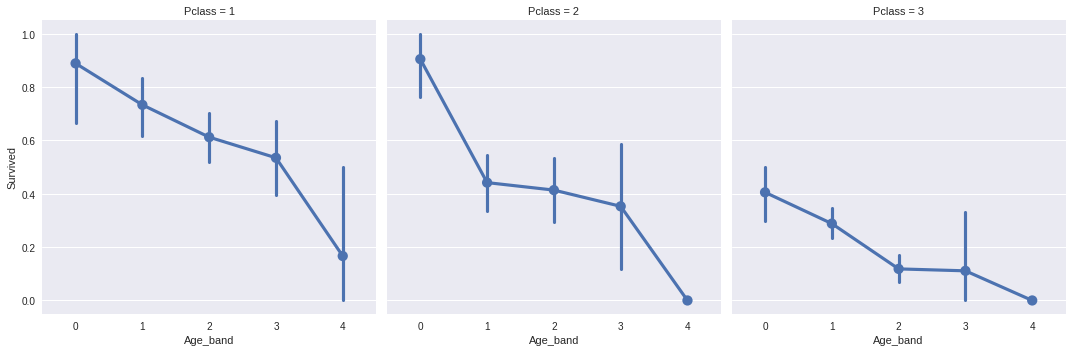

In [40]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

True that... the survival rate decreases as the age increases irrespective of the Pclass.

정말로.. Pclass와 상관없이 나이가 증가함에 따라 생존율은 감소한다.

### Family_Size and Alone

At this point, we can create new features called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.


이 점에서 우리는 Family_size와 Alone이라는 새로운 변수를 추가하고 분석해볼 수 있다. 이 피쳐는 Parch와 SibSp의 요약이다. 결합된 데이터를 주고 생존율과 승객 가족의 크기가 관계가 있는지 확인할 수 있게 해준다. Alone은 승객이 외동인지 아닌지를 보여준다. 

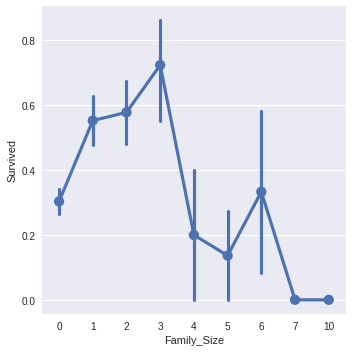

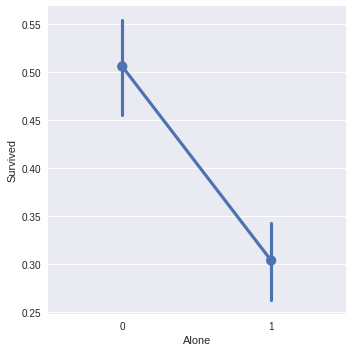

'\n원문에는 \nplt.close(2)\nplt.close(3)\n으로 되어있음...\n'

In [41]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] #family size
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1 #Alone

f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
#plt.close(0)
plt.close(1)
plt.show()

"""
원문에는 
plt.close(2)
plt.close(3)
으로 되어있음...
"""

**Family_Size = 0 means that the passenger is alone.** Clearly, if you are alone or family_size = 0, then chances for survival is very low. For family_size > 4, the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.


Family_Size = 0은 승객이 1인 가족임을 의미한다. 즉, 홀로이거나 family_size가 0이라면 생존가능성은 매우 낮을 것이다. 가족규모가 4보다 크면 가능성은 또한 감소한다. 모델에 중요한 피쳐인 것처럼 보인다. 더 깊이 알아보자.

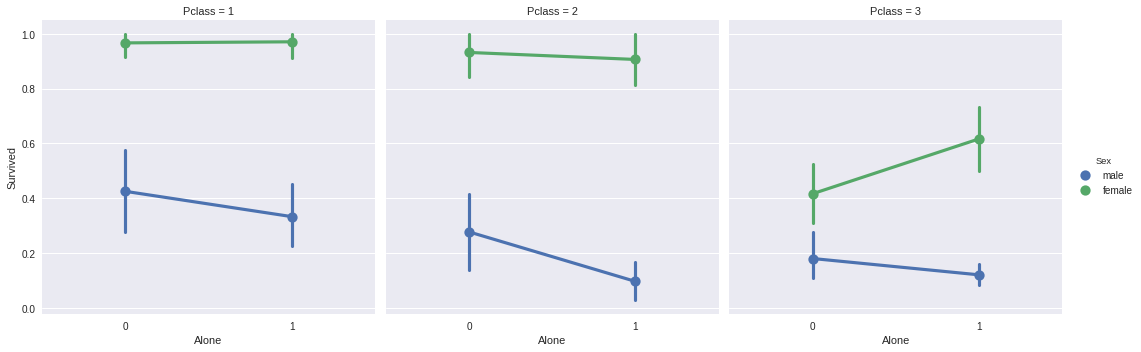

In [42]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chaces of females who are alone is high than those with family.


Sex 또는 가족들과 사는 것보다 혼자 사는 여성의 생존가능성이 더 높은 Pclass3을 제외한 Pclass와 상관없이 혼자 사는 사람이 위험해보임은 명확하다. 

### Fare_Range

Since fare is also a continuous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**.

So what **qcut** does is it splits or arranges the value according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 sperate bins or value ranges.


요금 또한 연속형 피쳐이기 때문에, 순서형 값으로 변환할 필요가 있다. 이를 위해 pandas.qcut을 사용할 것이다. 

qcut이 하는 것은 우리가 정했던 구간의 수에 따라 값을 나누거나 정렬해주는 것이다. 5개의 구간으로 나눈다고 하면, 값을 똑같이 5개의 분리된 구간 또는 범위에 분배해줄 것이다.  

In [43]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band.


위에서 논의했듯이, 요금 구간이 증가할 수록, 생존가능성이 높아짐을 볼 수 있다.

요금 구간을 그 자체로 사용할 수 없다. 이를 Age_Band에서 했듯이 단일 변수로 바꿔주어야 한다. 

In [44]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

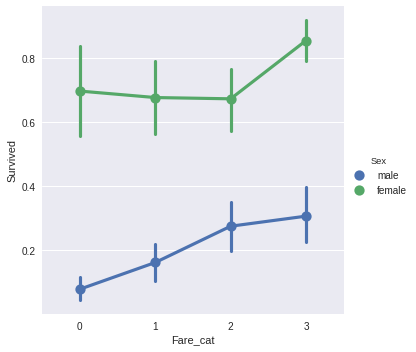

In [45]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with Sex.


명확히 하면, Fare_cat이 증가할 수록 생존가능성을 커진다. 이 피쳐는 성별에 따른 모델링을 수행할 때 중요한 피쳐가 될지도 모른다.

### Converting String Values into Numeric (문자 값을 수치형으로 전환)

Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.


문자열을 머신러닝 모델에 사용할 수 없기 때문에, Sex, Embarked등과 같은 피쳐들을 수치로 바꿔줄 필요가 있다. 

In [46]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1 ,2, 3, 4], inplace=True)

#### Dropping UnNeeded Features

**Name** --> We don't need name feature as it cannot be converted into any categorical value. (명목형 변수로 바꿀 수 없기 때문제 필요없다)

**Age** --> We have the Age_band feature, so no need of this. (Age_band 피쳐를 만들었기 때문에 필요없다)

**Ticket** --> It is any random string that cannot be categorized. (임의의 문자열이기 때문에 범주화할 수 없다)

**Fare** --> We have the Fare_cat feature, so unneeded. (Fare_cat 피쳐를 만들었기에 불필요하다)

**Cabin** --> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature. (널값이 많고 많은 승객들이 여러 객실을 가지고 있다. 쓸모없는 피쳐이다)

**Fare_Range** --> We have fare_cat feature. (fare_cat 피쳐를 가지고 있다)

**PassengerId** --> Cannot be categorized. (범주화할 수 없다)

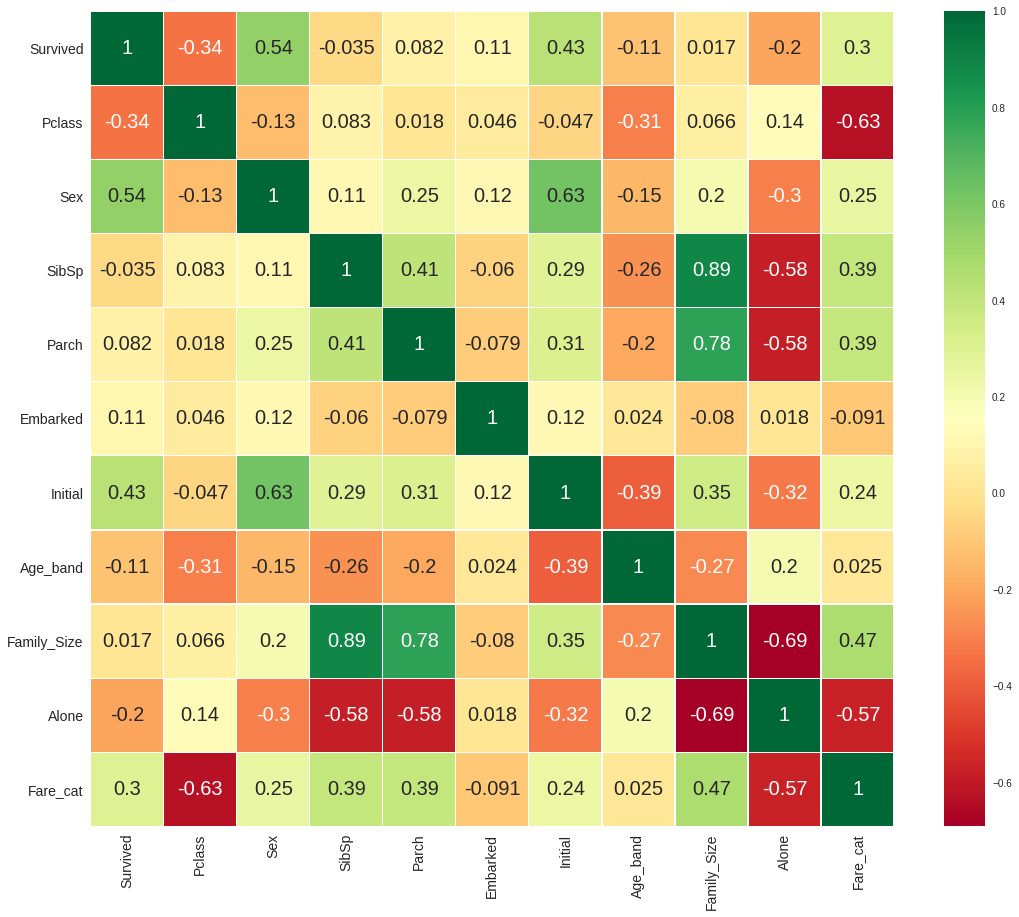

In [47]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size**. 


위의 상관관계 그래프를 보면, 양의 상관관계를 가진 피쳐들을 볼 수 있다. 그들중 몇개는 SibSp와 Family_Size, Parch와 Family_Size이고 Alone과 Family_Size처럼 음의 상관관계를 가진 것들도 있다. 

## Part3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we predict the whether the Passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model:

탐색적 자료 분석 파트에서 몇몇 인사이트들을 얻었다. 그러나 그것만으로는 정확하게 승객이 생존하거나 사망할거라고 예측할 수 없다. 그래서 이제 훌륭한 분류 알고리즘을 사용하여 승객이 생존할지 죽을지 예측한다. 다음은 모델을 만들이 위해 사용할 알고리즘들이다. 

1) Logistic Regression (로지스틱 회귀)

2) Support Vector Machines(Linear and radial) (서포트 벡터 머신)

3) Random Forest (랜덤 포레스트)

4) K-Nearest Neighbors (K-NN, 최근접이웃)

5) Naive Bayes (나이브 베이즈)

6) Decision Tree (의사결정나무)

In [48]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector machine
from sklearn.ensemble import RandomForestClassifier #Radom Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split (훈련, 테스트 데이터 분리)
from sklearn import metrics #accuracy measure (정확도 측정)
from sklearn.metrics import confusion_matrix #for confusion matrix (혼동행렬)

In [49]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

#### Radial Support Vector Machine(rbf-SVM)

In [50]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [51]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### K-Nearest Neighbors(KNN)

In [54]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.832089552238806


Now the accuracy for the KNN model changes as we change the values for n_neighbors attribute. The default value is 5. Lets check the accuracies over various of n_neighbors.

n_neighbors 속성의 값을 변화시키면 KNN 모델의 정확도도 변한다. 기본값은 5이다. 다양한 n_neighbors를 적용해서 정확도를 확인해보자.

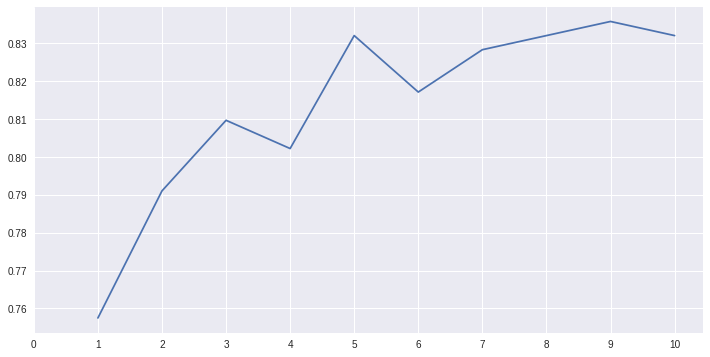

Accuracies for different values of n are [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [55]:
a_index = list(range(1, 11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()
print('Accuracies for different values of n are', a.values, 'with the max value as', a.values.max())

#### Gaussian Naive Bayes

In [56]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the Naive Bayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the Naive Bayes is 0.8134328358208955


#### Random Forests

In [57]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8246268656716418


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.

Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over?? The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may decrease. This is known as **model variance**.

To overcome this and get a generalized model, we use **Cross Validation**.


모델의 정확도는 분류기의 강인성을 결정할 수 있는 유일한 요소가 아니다. 분류기는 훈련데이터를 훈련하고 테스트데이터를 테스트하여 90%의 정확도를 만들어낸다고 하자.

이제 이것은 분류기에 아주 좋은 정확도인 것으로 보이나, 모든 새로운 테스트셋에 90%의 정확도를 나타낼 것이라 확신할 수 있나? 대답은 아니다. 분류기가 자신을 훈련시키는 데 사용할 모든 인스턴스를 결정할 수 없기 때문에. 훈련, 테스트 데이터가 변함에 따라 정확도도 변한다. 아마도 감소할 것이다. 모델 분산(?) 이라고 알려져있다.

이를 해결하고 일반화된 모델을 만들기 위해, 교차 검증을 사용한다.

## Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1) The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2) Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3) We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalized model.


많은 경우에, 데이터는 불균등하다, 예를 들어 class1 인스턴스 수는 많지만 다른 클래스 인스턴스 수는 적을 수 있다. 이런식으로 데이터셋의 각각 그리고 모든 인스턴스에 대해 알고리즘을 훈련시키고 검증해야한다. 그러면 데이터셋에 대한 모든 정확도를 평균해 볼 수 있을 겁니다.

1) K 교차 검증은 데이터셋을 k개의 부분집합으로 나누는 데서 시작한다.

2) 5개의 부분으로 데이터셋을 나눈다고 해보자. 하나의 부분을 검증하고 나머지 네부분을 사용해 알고리즘을 훈련시킨다.

3) 각 반복에서 테스트 부분을 변경하고 알고리즘을 다른 부분들에 대해 훈련시킴으로써 과정을 계속한다. 그런 다음 알고리즘의 평균 정확도를 얻기 위해 정확도와 오류를 평균시킨다.

이를 K 교차 검증이라고 한다.

4) 알고리즘은 일부 훈련 데이터에 대해 데이터셋을 과소적합하거나 때론 다른 훈련 데이터에 대해 데이터를 과대적합한다. 따라서 교차검증을 통해, 일반화된 모델을 만들어낼 수 있다. 

In [58]:
from sklearn.model_selection import KFold #for K-fold cross validation (k교차검증을 위해)
from sklearn.model_selection import cross_val_score #score evaluation (점수 평가)
from sklearn.model_selection import cross_val_predict #prediction (예측)
kfold = KFold(n_splits=10, random_state=22) #k=10, split the data into 10 equal parts (데이터를 10개의 똑같은 부분으로 나눈다)
xyz = []
accuracy =[]
std = []
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel = 'linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), 
          DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.810350,0.030160
Naive Bayes,0.801386,0.028999
Random Forest,0.809213,0.030073


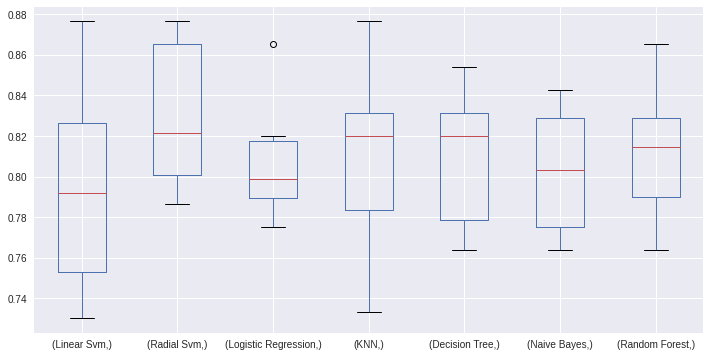

In [59]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

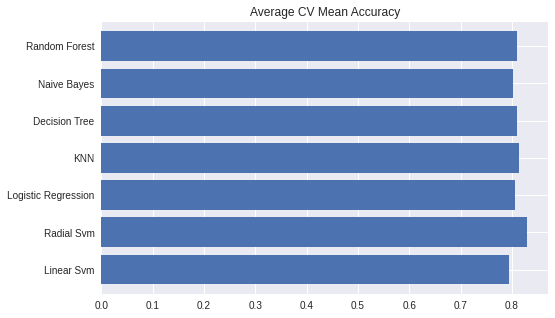

In [60]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

The classification accuracy can be sometimes misleading due to imbalance. We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.


불균형 때문에 분류 정확도는 가끔 틀릴 수 있다. 모델이 어디서 잘못됐는지 혹은 모델이 잘목 예측한 클래스를 알려주는 혼동행렬의 도움으로 요약된 결과를 얻을 수 있다. 

### Confusion Matrix

It gives the number of correct and incorrect classifications made by the classifier.

분류기로 만들어진 옳고 그른 분류의 개수를 보여준다.

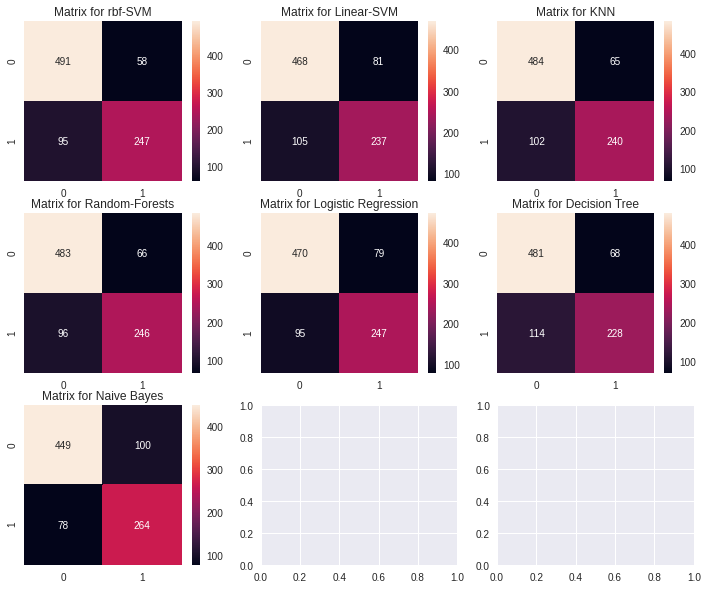

In [61]:
f, ax = plt.subplots(3, 3, figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax = ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#### Interpreting Confusion Matrix (혼동행렬 해석)

The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong predictions made. Lets consider the first plot for rbf-SVM:

1) The no. of correct predictions are **491(for dead) + 247(for survived)** with the mean CV accuracy being **(491+247)/891 = 82.8%** which we did get earlier.

2) **Errors** --> Wrongly Classified 58 daed people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.


왼쪽 대각선은 각각의 클래스에 대해 옳게 예측한 수를 보여주는 반면 오른쪽 대각선은 틀리게 예측한 수를 보여준다. 첫번째 rbf-SVM의 그래프를 봐보자.

1) 정확한 예측의 수는 491(사망자) + 247(생존자)이며, 평균 CV(변동계수) 정확도는 (491+247)/891 = 82.8%로 앞서 얻은 것이다. 

2) 오류 --> 살았는데 죽었다고 틀리게 분류된 58명과 죽었는데 살았다고 틀리게 분류된 95명이다. 이런식으로 산 사람을 죽었다고 예측함으로써 많은 오류를 만들었다.

모든 행렬을 보면, rbf-SVM이 사망한 승객을 가장 잘 예측했다고 할 수 있지만, NaiveBayes가 생존한 승객을 가장 잘 예측했다고 할 수 있다. 

#### Hyper-Parameters Tuning (하이퍼파라미터 튜닝)

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning. 

We will tune the hyper-parameters for the 2 best classifier i.e the SVM and RandomForests.


머신러닝 모델들은 블랙박스와 같다. 블랙박스는 기본 파라미터 값들이 있는데, 더 나은 모델을 얻기 위해 조율하거나 변화시킬 수 있다. SVM모델에 있는 C와 gamma와 다른 분류기의 유사하게 다른 파라미터들과 같은 것들을 하이퍼파라미터라고 하는데, 알고리즘의 학습률을 변화시키고 더 나은 모델을 얻기 위해 이들을 조율한다. 이를 하이퍼파라미터 튜닝이라고 한다.

두 최적의 분류기인 SVM과 RandomForest를 가지고 하이퍼파라미터 튜닝을 할 것이다. 

#### SVM

In [62]:
from sklearn.model_selection import GridSearchCV
C = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel':kernel, 'C':C, 'gamma':gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282593685267716
SVC(C=0.4, gamma=0.3)


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:   23.1s finished


#### Random Forests

In [63]:
n_estimators = range(100, 1000, 100)
hyper = {'n_estimators':n_estimators}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   41.9s finished


0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for rbf-SVM is 82.82% with C=0.4 and gamma=0.3. For Random Forest, score is about 81.9% with estimators = 300.

## Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a sigle powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgment about a single product after analysing all different parameters. This is Ensembling, which improves the stability of the model. Ensembling can be done in ways like:


앙상블을 모델의 정확도나 성능을 높이기 위한 좋은 방법이다. 간단히 말하면 여러 단순 모델을 조합하여 하나의 강력한 모델을 만들어내는 것이다. 

핸드폰을 사기 위해 많은 사람들에게 다양한 파라미터들에 대해 물어본다고 해보자. 그러면 많은 다른 파라미터를 분석해본 후 하나의 제품에 대해 강한 판단을 만들 수 있다. 이것이 앙상블이고, 모델의 안정성을 높여준다. 앙상블은 다음과 같은 방식으로 수행될 수 있다.


1) Voting Classifier (분류기 선별(?), 다수결)

2) Bagging (배깅)

3) Boosting (부스팅)

### Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of different types.


많은 다른 간단한 머신러닝 모델의 예측을 결합하는 가장 단순한 방법이다. 모든 서브모델의 예측에 근거하여 평균 예측 결과를 제공한다. 서브모델이나 베이스모델은 모두 형태가 다르다.

In [64]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8249188514357053


### Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging, there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

배깅은 일반적인 앙상블 방법이다. 유사한 분류기들을 데이터셋의 작은 부분들에 적용한 다음 모든 예측의 평균을 취함으로써 작동한다. 평균을 내는 것 때문에 분산이 작아진다. 다수결과는 다르게, 배깅은 유사한 분류기를 사용한다.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of n_neighbors, as small value of n_neighbors.

배깅을 큰 분산을 가진 모델들과 가장 잘 작동한다. 의사결정나무와 랜덤포레스트를 예로 들 수 있다. n_neighbors의 작은 값을 가진 KNN을 n_neighbors의 작은 값으로 사용할 수 있다. 

In [65]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:',  result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated score for bagged KNN is: 0.8160424469413232


#### Bagged DecisionTree

In [67]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

Boosting is an ensembling technique which uses sequential learning of classifier. It is a step by step enhancement of a weak model. Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteraion, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continuous, and new classifiers are added to the model until the limit is reached on the accuracy.


부스팅은 분류기의 연속적인 학습을 사용한 기술을 앙상블하는 것이다. 약한 모델을 단계별로 향상시키는 것이다. 부스팅은 다음과 같이 작동한다.

모델은 완전한 데이터셋에 대해 첫번째로 훈련된다. 이제 모델은 몇몇 사례를 맞출 것이고 몇몇은 틀릴 것이다. 다음 반복에서 학습기는 틀리게 예측한 사례에 대해서 초점을 맞추거나 더 큰 가중치를 부여할 것이다. 그래서 틀린 사례를 올바르게 예측하기 위해 노력할 것이다. 이제 이 반복적인 과정을 계속되며, 정확도에 대한 한계에 도달할 때까지 모델에 새로운 분류기가 추가된다. 

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decision Tree. But we can change the default base_estimator to any algorithm of our choice.

이 경우 약한 학습기나 측정기는 의사결정나무이다. 그러나 기본 base_estimator를 원하는 알고리즘으로 변결할 수 있다. 

In [69]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic(확률적) Gradient Boosting

Here too the weak learner is a Decision Tree.

여기서도 약한 학습기는 의사결정나무이다. 


In [71]:
from sklearn.ensemble import GradientBoostingClassifier 
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result = cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [72]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result = cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The croaa validated score for XGBoost is:', result.mean())

The croaa validated score for XGBoost is: 0.8160299625468165


We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning. 

AdaBoost로 가장 높은 정확도를 얻었다. 하이퍼파라미터 튜닝을 통해 더 높이고자 할 것이다.

#### Hyper-Parameter Tuning for AdaBoost

In [75]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper = {'n_estimators':n_estimators, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 10.3min finished


The maximum accuracy we can get with AdaBoost is 82.9% with n_estimators=100 and learning_rate=0.1.

AdaBoost로 얻을 수 있는 최고 정확도는 83.16%이다. 

#### Confusion Matrix for the Best Model

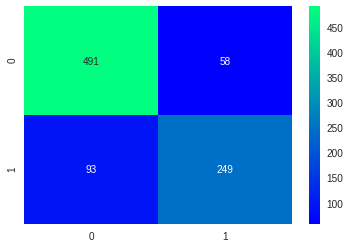

In [78]:
ada = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, result), cmap='winter', annot=True, fmt='2.0f')
plt.show()

### Feature Importance (변수 중요도)

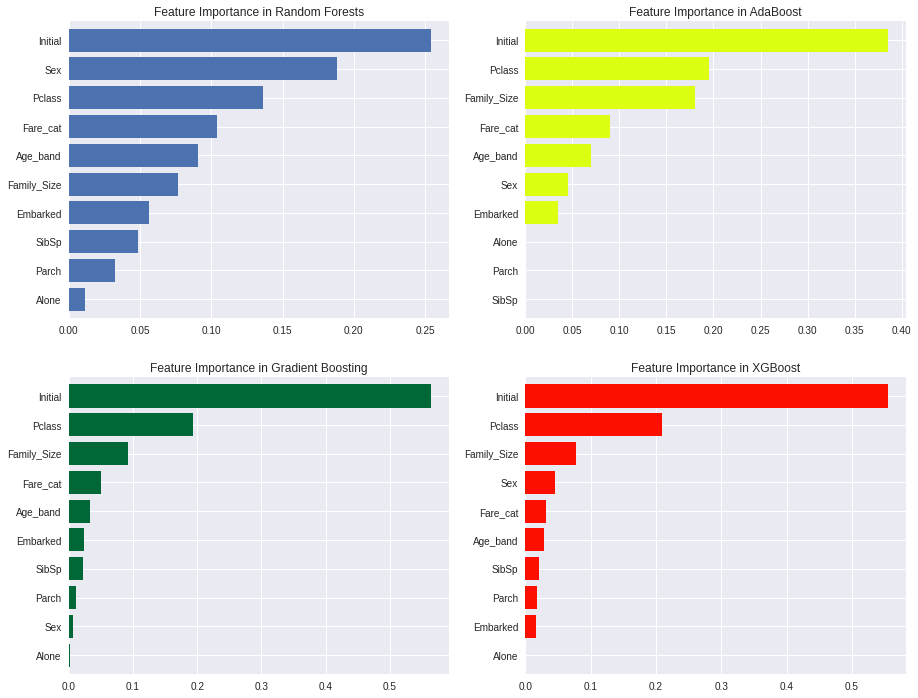

In [82]:
f, ax = plt.subplots(2, 2, figsize=(15,12))
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model = xg.XGBClassifier(n_estimators=900, learning_rate=0.01)
model.fit(X, Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XGBoost')
plt.show()

We can see the importance features for various classifiers like RandomForests, AdaBoost, etc.

랜덤포레스트, 아다부스트와 같은 다양한 분류기에 대해 중요한 피쳐들을 볼 수 있다. 

**Observations:**

1) Some of the common important features are Initial, Fare_cat, Pclass, Family_Size.

2) The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers. We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3) Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone, Parch, SibSp.

1) 공통적으로 중요한 변수들은 Initial, Fare_cat, Pclass, Family_Size이다.

2) Sex 피쳐는 중요하지 않아보이는데, 이전에 Pclass와 결합했을때는 아주 좋은 차별화 요소를 주었다는 점에서 충격적이다. Sex 피쳐는 랜덤포레스트에서만 중요해보인다.

그러나 많은 분류기에서 상위에 있는 Initial 피쳐를 볼 수 있다. 이미 Sex와 Initial이 양의 상관관계가 있고, 둘 다 성별을 암시하고 있음을 봤다.

3) 비슷하게 Pclass와 Fare_cat은 승객의 지위와 Alone, Parch, SibSp와 함께 Family_Size를 암시한다.